In [1]:
import sys
sys.path.append('../src/vysxd')
from vysxd_analysis import *
from vysxd_define import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

In [2]:
'''
Change this based on which simulation you would like to look at
'''

simulation_name = "magshockz-v1.1.1d" 
proj_dir = os.getcwd().removesuffix("analysis_scripts")
print(proj_dir)

/home/david/MagShockZ/


In [3]:
# move into that directory
os.chdir(f'../simulations/raw_data/{simulation_name}')
species_list = os.listdir('MS/DENSITY')

['p1x1-electronsBackground-000000.h5' 'p1x1-electronsBackground-000001.h5'
 'p1x1-electronsBackground-000002.h5' 'p1x1-electronsBackground-000003.h5'
 'p1x1-electronsBackground-000004.h5' 'p1x1-electronsBackground-000005.h5'
 'p1x1-electronsBackground-000006.h5' 'p1x1-electronsBackground-000007.h5'
 'p1x1-electronsBackground-000008.h5' 'p1x1-electronsBackground-000009.h5'
 'p1x1-electronsBackground-000010.h5' 'p1x1-electronsBackground-000011.h5'
 'p1x1-electronsBackground-000012.h5' 'p1x1-electronsBackground-000013.h5'
 'p1x1-electronsBackground-000014.h5' 'p1x1-electronsBackground-000015.h5'
 'p1x1-electronsBackground-000016.h5' 'p1x1-electronsBackground-000017.h5'
 'p1x1-electronsBackground-000018.h5' 'p1x1-electronsBackground-000019.h5'
 'p1x1-electronsBackground-000020.h5' 'p1x1-electronsBackground-000021.h5'
 'p1x1-electronsBackground-000022.h5' 'p1x1-electronsBackground-000023.h5'
 'p1x1-electronsBackground-000024.h5' 'p1x1-electronsBackground-000025.h5'
 'p1x1-electronsBackgroun

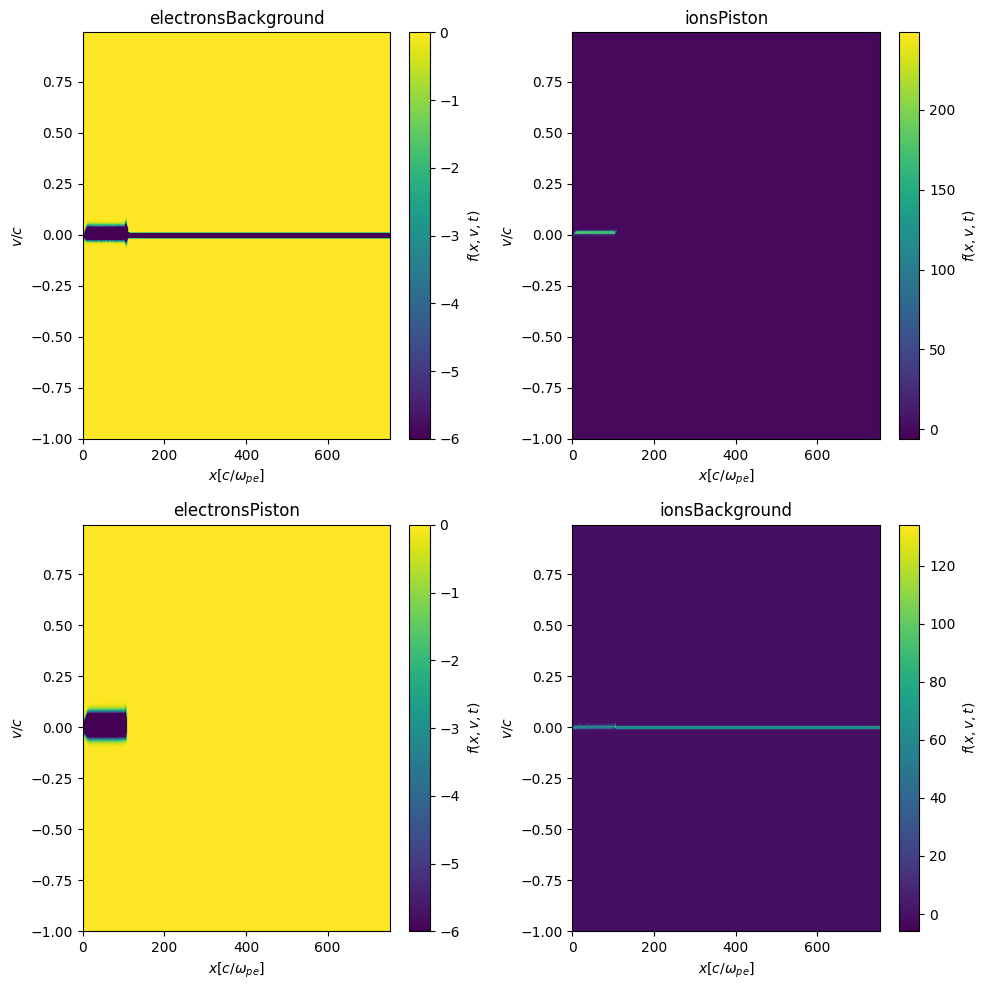

In [4]:
## Look at initial conditions

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
timestep = 7
# Flatten the axes array for easy iteration
axs = axs.flatten()

for i in range(len(species_list)):
    phase_space = get_osiris_quantity_2d(f'MS/PHA/p1x1/{species_list[i]}/');
    im = axs[i].imshow(phase_space[0][timestep], origin='lower', extent=[phase_space[5][0], phase_space[5][-1],phase_space[6][0],phase_space[6][-1]], aspect='auto', vmin = -6);
    fig.colorbar(im,label=r'$f(x,v,t)$')
    axs[i].set_title(f'{species_list[i]}')
    axs[i].set_xlabel(r'$x [c/\omega_{pe}]$')
    axs[i].set_ylabel(r'$v/c$')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

['p1x1-ionsBackground-000000.h5' 'p1x1-ionsBackground-000001.h5'
 'p1x1-ionsBackground-000002.h5' 'p1x1-ionsBackground-000003.h5'
 'p1x1-ionsBackground-000004.h5' 'p1x1-ionsBackground-000005.h5'
 'p1x1-ionsBackground-000006.h5' 'p1x1-ionsBackground-000007.h5'
 'p1x1-ionsBackground-000008.h5' 'p1x1-ionsBackground-000009.h5'
 'p1x1-ionsBackground-000010.h5' 'p1x1-ionsBackground-000011.h5'
 'p1x1-ionsBackground-000012.h5' 'p1x1-ionsBackground-000013.h5'
 'p1x1-ionsBackground-000014.h5' 'p1x1-ionsBackground-000015.h5'
 'p1x1-ionsBackground-000016.h5' 'p1x1-ionsBackground-000017.h5'
 'p1x1-ionsBackground-000018.h5' 'p1x1-ionsBackground-000019.h5'
 'p1x1-ionsBackground-000020.h5' 'p1x1-ionsBackground-000021.h5'
 'p1x1-ionsBackground-000022.h5' 'p1x1-ionsBackground-000023.h5'
 'p1x1-ionsBackground-000024.h5' 'p1x1-ionsBackground-000025.h5'
 'p1x1-ionsBackground-000026.h5' 'p1x1-ionsBackground-000027.h5'
 'p1x1-ionsBackground-000028.h5' 'p1x1-ionsBackground-000029.h5'
 'p1x1-ionsBackground-000

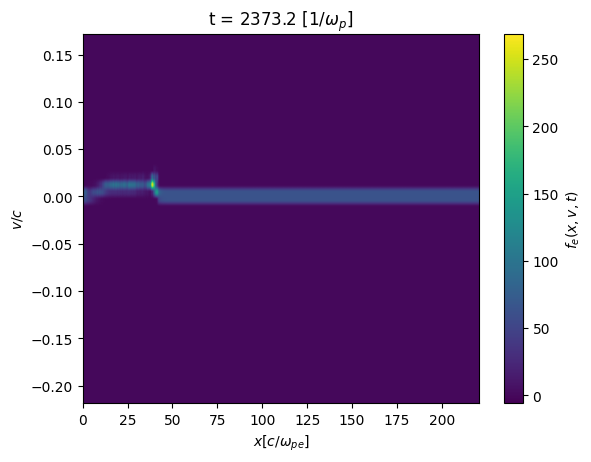

In [17]:
# Make a movie of density in phase space

quantity = get_osiris_quantity_2d(f'{proj_dir}/simulations/raw_data/{simulation_name}/MS/PHA/p1x1/{species_list[3]}/')

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='charge-density-animation', artist='Matplotlib',
                comment='visualizing the phase space evolution of the distribution function') # Describe what the animation is
writer = FFMpegWriter(fps=24, metadata=metadata) # you can adjust the fps here.

# Initialize the movie
fig = plt.figure()


plt.tight_layout()
# Update the frames for the movie
with writer.saving(fig, f"../../../analysis_scripts/{species_list[3]}_phase_space.mp4", dpi=400):
    for t in range(len(quantity[4])):
        plt.clf() # This clears the figure so you don't make a million colorbars lol
        plt.title(f't = {round(quantity[4][t],1)} $[1/\omega_p]$')
        xmin_i = 0; xmax_i = 300; vmin_i = 100; vmax_i = 150;
        plt.imshow(quantity[0][t][xmin_i:xmax_i][vmin_i:vmax_i], origin='lower', extent=[quantity[5][xmin_i], quantity[5][xmax_i],quantity[6][vmin_i],quantity[6][vmax_i]], aspect='auto', vmin = -6)
        plt.colorbar(label=r'$f_e(x,v,t)$')
        plt.xlabel(r'$x [c/\omega_{pe}]$') # Might need to rework this if the axes aren't static
        plt.ylabel(r'$v/c$')
        writer.grab_frame()

In [13]:
np.shape(quantity[0])

(38, 256, 1024)

dict_keys(['time', 'Ek', 'Eemf', 'par_ene', 'B_ene', 'E_ene', 'B1_ene', 'B2_ene', 'B3_ene', 'E1_ene', 'E2_ene', 'E3_ene', 'ene_conserv'])


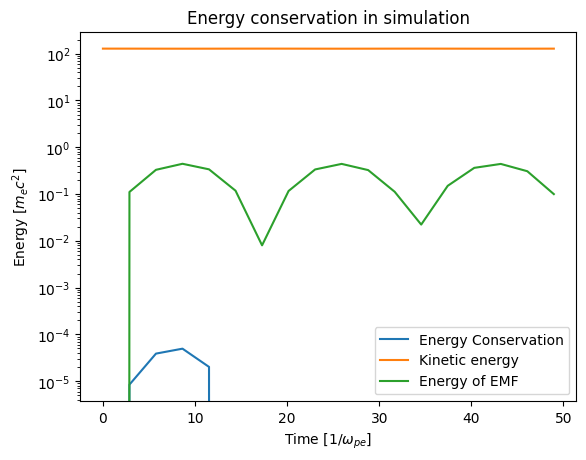

In [10]:
# check that you don't have too much numerical heating
energy_analysis = ene_analysis("HIST/",osirisv='osiris4')
print(energy_analysis.keys())

plt.title("Energy conservation in simulation")
plt.semilogy(energy_analysis['time'],energy_analysis['ene_conserv'], label = 'Energy Conservation')
plt.semilogy(energy_analysis['time'],energy_analysis['Ek'], label = 'Kinetic energy')
plt.semilogy(energy_analysis['time'],energy_analysis['Eemf'], label = 'Energy of EMF')

plt.xlabel(r'Time $[1/\omega_{pe}]$')
plt.ylabel(r'Energy $[m_e c^2]$')
plt.legend()

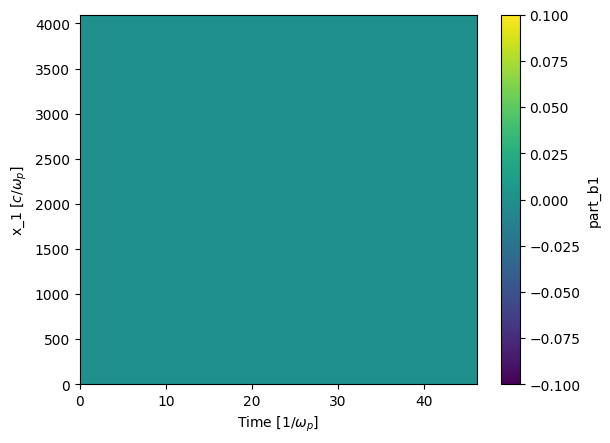

In [16]:
# make a streak plot of Bz
def streak_plot(q, q_0=None) -> None:
    fig, ax = plt.subplots()
        # Make a heatmap of quantity in (t,x) space (sorry Paulo)
    plt.imshow(np.transpose(q[0]), origin='lower', extent=[q[3][0], q[3][-1], q[4][0], q[4][-1]], aspect='auto')

        # If vysxd.data_object timeshot is supplied, use this to label axes
    if (q_0 != None):
        plt.ylabel(f"{q_0.AXIS1_NAME} [${q_0.AXIS1_UNITS}$]")
        plt.xlabel(f"Time [${q_0.TIME_UNITS}$]")
        plt.colorbar(label=q_0.DATA_NAME)

b3 = get_osiris_quantity_1d('MS/FLD/part_b1/')
b3_0 = vysxd_get_data('MS/FLD/part_b1/part_b1-000000.h5')
streak_plot(b3, b3_0)

/tmp/ipykernel_33457/4209653748.py:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(-p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -6)


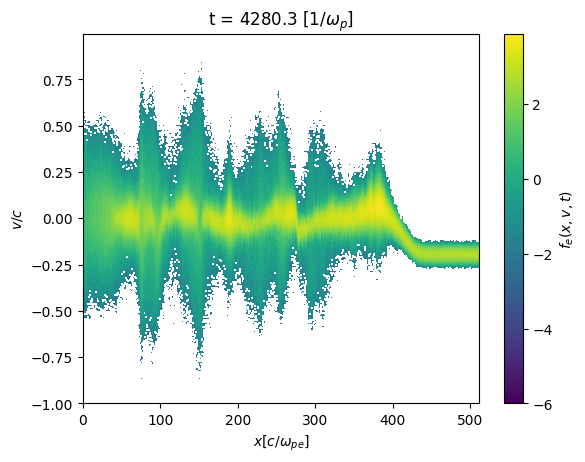

In [3]:

p1x1_files = np.sort(os.listdir('data/MS/PHA/p1x1/electrons/')) # Create a sorted list of filenames you will be analyzing

if not (os.path.isdir('figures')): # Create a directory for the animation, if there isn't one already
    os.makedirs('figures')
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='phase-space-animation', artist='Matplotlib',
                comment='visualizing the phase space evolution of the distribution function') # Describe what the animation is
writer = FFMpegWriter(fps=24, metadata=metadata) # you can adjust the fps here.

# Initialize the movie
fig = plt.figure()



plt.tight_layout()
# Update the frames for the movie
with writer.saving(fig, f"figures/electron_phase_space.mp4", dpi=400):
    for file in p1x1_files:
        p1x1 = vysxd_get_data(f'data/MS/PHA/p1x1/electrons/{file}') # Pull the phase space data
        plt.clf() # This clears the figure so you don't make a million colorbars lol
        plt.title(f't = {round(p1x1.TIME[0],1)} $[1/\omega_p]$')
        plt.imshow(np.log(-p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -6)
        plt.colorbar(label=r'$f_e(x,v,t)$')
        plt.xlabel(r'$x [c/\omega_{pe}]$') # Might need to rework this if the axes aren't static
        plt.ylabel(r'$v/c$')
        # plt.ylim(-0.3,0.3)
        writer.grab_frame()

/tmp/ipykernel_33457/692526659.py:21: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -6)


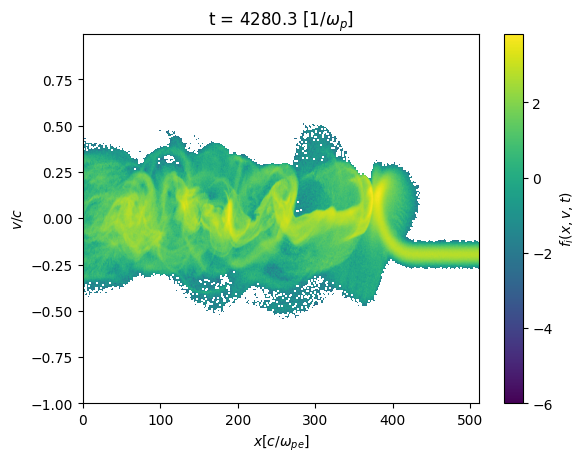

In [5]:
p1x1_files = np.sort(os.listdir('data/MS/PHA/p1x1/ions/')) # Create a sorted list of filenames you will be analyzing

if not (os.path.isdir('figures')): # Create a directory for the animation, if there isn't one already
    os.makedirs('figures')
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='phase-space-animation', artist='Matplotlib',
                comment='visualizing the phase space evolution of the distribution function') # Describe what the animation is
writer = FFMpegWriter(fps=18, metadata=metadata) # you can adjust the fps here.

# Initialize the movie
fig = plt.figure()

plt.tight_layout()
# Update the frames for the movie
with writer.saving(fig, f"figures/ion_phase_space.mp4", dpi=400):
    for file in p1x1_files:
        p1x1 = vysxd_get_data(f'data/MS/PHA/p1x1/ions/{file}') # Pull the phase space data
        plt.clf() # This clears the figure so you don't make a million colorbars lol
        plt.title(f't = {round(p1x1.TIME[0],1)} $[1/\omega_p]$')
        plt.imshow(np.log(p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -6)
        plt.colorbar(label=r'$f_i(x,v,t)$')
        plt.xlabel(r'$x [c/\omega_{pe}]$') # Might need to rework this if the axes aren't static
        plt.ylabel(r'$v/c$')
        # plt.ylim(-0.3,0.3)
        writer.grab_frame()

In [17]:
dir = "pairplasma/data"
print(dir.removesuffix('data'))

species = 'positrons'

print(r'$log(f_'+species[0]+r'(x,v,t))$')

pairplasma/
log(f_p(x,v,t))


In [18]:
print(r'$\omega$')

$\omega$
